In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Read data 

In [2]:
data = pd.read_csv('D:\FirstSemMT\ML\Assignments\cancer.csv')
data.drop(['id','diagnosis','Unnamed: 32'], axis = 1, inplace = True) 
data = data.values
samples,features = data.shape
print(samples,features)

569 30


#### Convert data in distance matrix (euclidean distance) 

In [3]:
dist_matrix = np.zeros(((data).shape[0],(data).shape[0]))
for i in range(samples):
    for j in range(samples):
        dist_matrix[i,j] = np.sqrt(np.sum((data[i]-data[j])**2))
print(dist_matrix)
np.shape(dist_matrix)
#print(nonred_dist_matrix)

[[   0.          341.73026209  376.45576488 ...  914.6951486
   338.48943912 1943.30456536]
 [ 341.73026209    0.          276.77623944 ...  955.8843023
   152.34464456 2044.26314974]
 [ 376.45576488  276.77623944    0.         ...  681.57069699
   133.5953386  1772.19457278]
 ...
 [ 914.6951486   955.8843023   681.57069699 ...    0.
   810.71408767 1095.19034482]
 [ 338.48943912  152.34464456  133.5953386  ...  810.71408767
     0.         1901.1259166 ]
 [1943.30456536 2044.26314974 1772.19457278 ... 1095.19034482
  1901.1259166     0.        ]]


#### Set each data points as a cluster 

In [4]:
cluster_label = np.zeros(samples)
for i in range(samples):
    cluster_label[i]=i

#### Update distance matrix and merge two closest clusters 

In [5]:
removed_rc = np.zeros(dist_matrix.shape[0])
while(np.shape(dist_matrix) != (2,2)):
    mask = np.ones(dist_matrix.shape, dtype=bool)
    np.fill_diagonal(mask, 0)
    min_value = dist_matrix[mask].min()
    #print(min_value)
    min_idxs = np.where(dist_matrix==min_value)
#     print(min_idxs)
    
    min_idx = np.zeros(2,int)
    min_idx[0] = min_idxs[0][0]
    min_idx[1] = min_idxs[1][0]
#     print(min_idx)
   
    nonre_i = np.where(removed_rc==0)[0][min_idx[0]] 
    nonre_j = np.where(removed_rc==0)[0][min_idx[1]]
    removed_rc[nonre_j]=1
   
    for i in range(np.shape(dist_matrix)[0]):
        dist_matrix[min_idx[0],i] = max(dist_matrix[min_idx[0],i],dist_matrix[min_idx[1],i])
        dist_matrix[i,min_idx[0]] = dist_matrix[min_idx[0],i]
        
    dist_matrix = np.delete(dist_matrix, (min_idx[1]), axis=0)
    dist_matrix = np.delete(dist_matrix, (min_idx[1]), axis=1)
            
    cl=np.where(cluster_label==cluster_label[nonre_j])
    cluster_label[cl[0]]=cluster_label[nonre_i]
    
    

#### Number of points in each clusters 

In [6]:
label = np.unique(cluster_label)
print('no. of points incluster 1:',np.where(cluster_label==label[0])[0].shape[0])
print('no. of points incluster 2:',np.where(cluster_label==label[1])[0].shape[0])

no. of points incluster 1: 549
no. of points incluster 2: 20


#### Scatter plot 

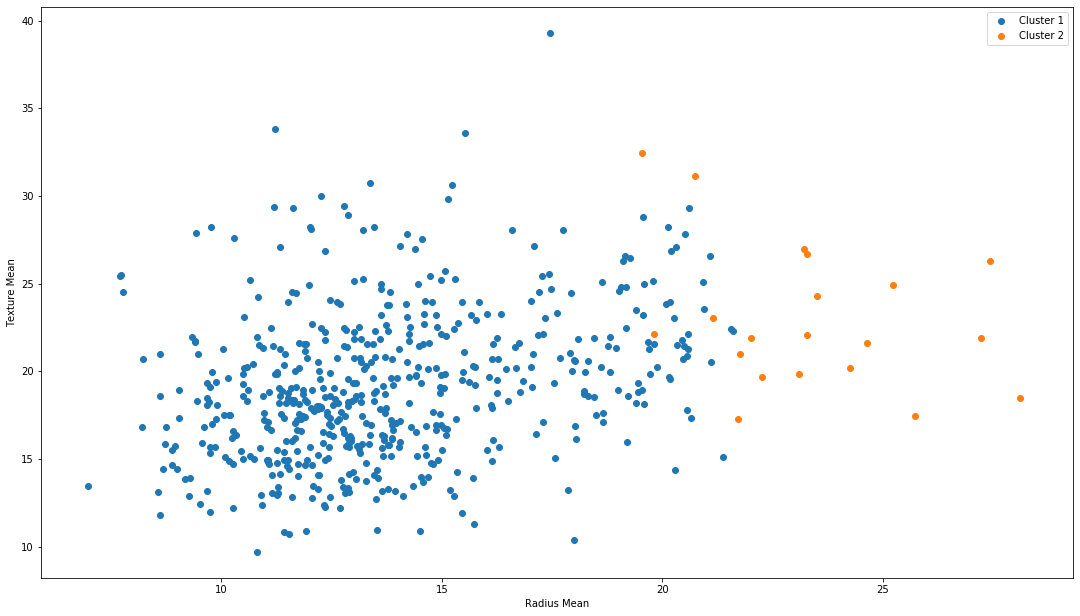

In [7]:
fig = plt.gcf()
plt.scatter(data[np.where(cluster_label==label[0])[0],0],data[np.where(cluster_label==label[0])[0],1],label='Cluster 1')
plt.scatter(data[np.where(cluster_label==label[1])[0],0],data[np.where(cluster_label==label[1])[0],1],label='Cluster 2')
fig.set_size_inches(18.5, 10.5)
plt.legend()
plt.xlabel('Radius Mean')
plt.ylabel('Texture Mean')
plt.show()